##  Build a Agentic ai model to calculate - 

    Will have input -> runs, ball, 4s, 6s

    The strike rate, balls per boundary & boundary percentage.

![](img/cricket_report.png)

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.2,
)

In [4]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: int
    ball_per_boundary: int
    boundary_percentage: int
    summary: str
    

In [10]:
# remember here since we are doing parallel updates -> we will do only partial update 
        # i.e -> return only the feature which is updated by that function & donot return anyanother
                # -> Why this causes an error -> b/c LangGraph at the very steps from parallel nodes on return all of the state variable 
                    # the edges expect an change in the other state too but as no changes are in those -> it throws an error

def strike_rate(state: BatsmanState):
    sr = (state['runs']/state['balls'])*100

    return {'strike_rate':sr}

def ball_per_boundary(state: BatsmanState):
    bpb = state['balls']/(state['fours']+state['sixes'])

    return {'ball_per_boundary':bpb}

def boundary_percentage(state: BatsmanState):
    bp = ((state['fours']*4 + state['sixes']*6)/state['runs'])*100

    return {'boundary_percentage':bp}

def summary(state: BatsmanState):
    summary = f"""
        strike_rate - {state['strike_rate']}
        ball_per_boundary - {state['ball_per_boundary']}
        boundary_percentage - {state['boundary_percentage']}
        """
    return{'summary':summary}

In [6]:
# define the State
graph = StateGraph(BatsmanState)

# add nodes to your graph
graph.add_node('strike_rate', strike_rate)
graph.add_node('ball_per_boundary', ball_per_boundary)
graph.add_node('boundary_percentage', boundary_percentage)
graph.add_node('summary', summary)

# add edges to your graph
graph.add_edge(START, 'strike_rate')
graph.add_edge(START, 'ball_per_boundary')
graph.add_edge(START, 'boundary_percentage')

graph.add_edge('strike_rate', 'summary')
graph.add_edge('ball_per_boundary', 'summary')
graph.add_edge('boundary_percentage', 'summary')

graph.add_edge('summary', END)

# compile the graph
workflow = graph.compile()

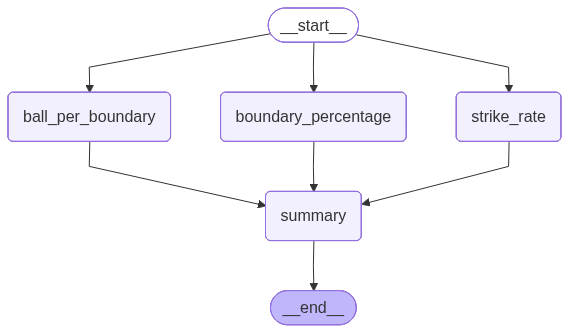

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

final_state = workflow.invoke(initial_state)

print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'strike_rate': 200.0, 'ball_per_boundary': 5.0, 'boundary_percentage': 48.0, 'summary': '\n        strike_rate - 200.0\n        ball_per_boundary - 5.0\n        boundary_percentage - 48.0\n        '}


In [9]:
print(final_state['summary'])


        strike_rate - 200.0
        ball_per_boundary - 5.0
        boundary_percentage - 48.0
        
